In [2]:
import sys
import os
import torch
import numpy as np
from detzoo.datasets.voc import VOCDataset
from detzoo.datasets.coco import COCODataset
from matplotlib import pyplot as plt
import torchvision.transforms as T

voc_dataset = VOCDataset(root='/home/lujialin/data/VOC', 
                        year='2012',
                        image_set='val')
# coco_dataset = COCODataset(root='/home/lujialin/data/COCO', 
#                            year='2017',
#                            image_set='val')

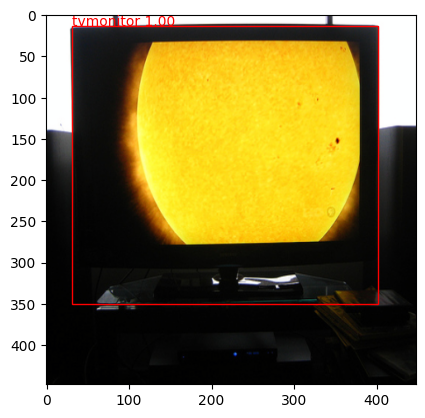

In [4]:
from detzoo.utils import plot_image_and_boxes, bbox_to_yolo_format, yolo_to_bbox_format

try:
    data_iter
except NameError:
    data_iter = iter(voc_dataset)

img, target = next(data_iter)

target = bbox_to_yolo_format([target], (448, 448))
target = yolo_to_bbox_format(target, (448, 448))[0]

mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
img = img.permute(1, 2, 0).numpy()
img = std * img + mean
img = np.clip(img, 0, 1)

plot_image_and_boxes(img, target, voc_dataset.classes)